# Project - Pasta Type Image Classification

## the following pasta types will be classified:

- spaghetti
- gnocchi
- penne

### install and import libraries

In [ ]:
pip install tensorflow

In [257]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [258]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

### helper function for plotting model 

In [259]:
def plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## helper function for confusion matrix

In [296]:
def print_confusion_matrix():
    
    generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    test_flow = generator.flow_from_directory(
        "./test_images",
        target_size=(img_height, img_width),
        batch_size=batch_size,
    )

    
    class_label = {v:k for k,v in test_flow.class_indices.items()}
    
    y_true = test_flow.classes
    predictions = model.predict(test_data_set)
    y_pred = np.argmax(predictions, axis=-1)
    
    cm = confusion_matrix(y_true, y_pred)
    print(cm) 
    cm = pd.DataFrame(cm , index = [class_label[i] for i in range(num_classes)] , columns = [class_label[i] for i in range(num_classes)])
    g = sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
    g.set_yticklabels(g.get_yticklabels(), rotation = 45)
    plt.figure(figsize = (3,3))

### number of epochs

In [298]:
epochs=10

### create training, validation and test dataset

In [288]:
import pathlib
data_dir = pathlib.Path("./images")
image_count = len(list(data_dir.glob('*/*')))
print(f'{image_count} images were loaded')

batch_size = 32
img_height = 180
img_width = 180

print("Training")
train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  shuffle=True,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
print("Validation")
validation_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  label_mode="categorical",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)


num_classes = len(class_names)
print("Test")
testdata_dir = pathlib.Path("./test_images")
test_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  testdata_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



1266 images were loaded
Training
Found 1266 files belonging to 3 classes.
Using 887 files for training.
Validation
Found 1266 files belonging to 3 classes.
Using 379 files for validation.
Test
Found 15 files belonging to 3 classes.


## improves the performance while training

In [269]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_set = train_data_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_data_set = validation_data_set.cache().prefetch(buffer_size=AUTOTUNE)
test_data_set = test_data_set.cache().prefetch(buffer_size=AUTOTUNE)

### check dataset

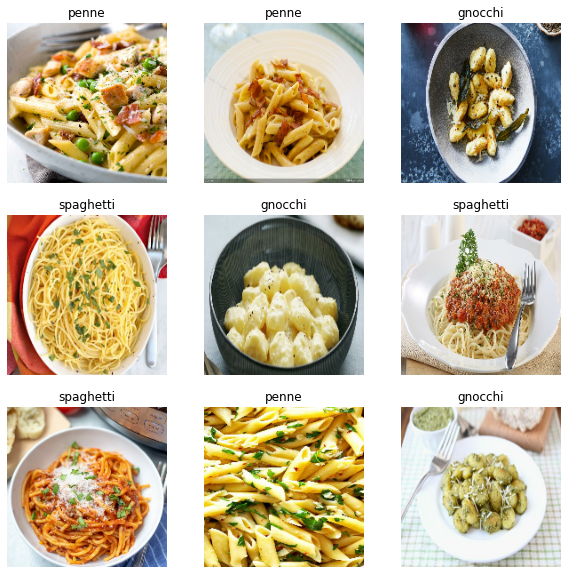

In [291]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_data_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data_set.class_names[labels[i]])
    plt.axis("off")

## first model

In [293]:
base_learning_rate = 0.001 

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_41 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 22, 22, 64)      

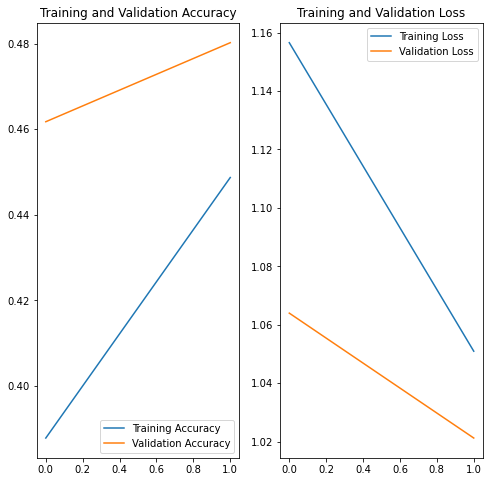

In [295]:
plot(history1)

## Conclusion

- the overall result is not really good with a validation accuracy of around 0.5
- on epoch 4 or 5 it seems that the model starts to overfit the data

## Next steps

- to stop overfitting we try the following things
    - generate more data with data augmentation
    - use a dropout of 10 % in our next model
 

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_69 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_42 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 45, 45, 64)      

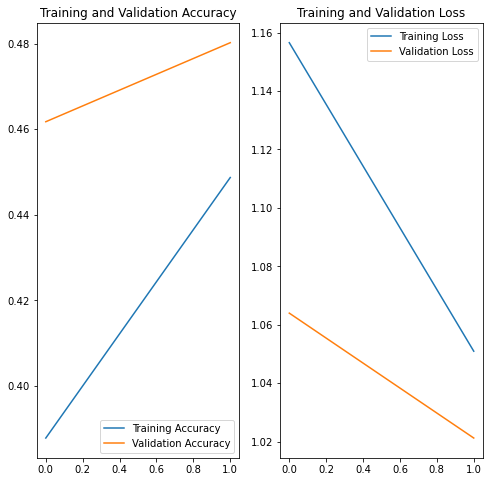

In [294]:
base_learning_rate = 0.001 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
            loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

## predict new data + confusion matrix

Found 15 images belonging to 3 classes.
[[3 0 2]
 [3 0 2]
 [3 0 2]]


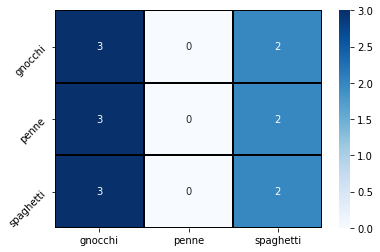

<Figure size 216x216 with 0 Axes>

In [297]:
print_confusion_matrix()
